# Jupyter notebook to visualize our results after training PyTorch model

Please run this notebook from the notebooks directory.

Some useful links:
- https://brandonrozek.com/blog/jupyterwithpyenv/

- https://github.com/microsoft/vscode-jupyter/wiki/Setting-Up-Run-by-Line-and-Debugging-for-Notebooks

In [1]:
!python --version

Python 3.10.6


In [2]:
import sys

sys.path.append('../')
sys.path.append('../src')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from hydra import initialize, compose
from omegaconf import OmegaConf
from pathlib import Path
from src import *
from src.trainer import Trainer


with initialize(version_base=None, config_path="../config"):
    cfg = compose(config_name='trainer.yaml')

    cfg.wandb.mode = "disabled"
    root_filename = "../" + cfg.dataset.filename
    
    ## Save dataset or load it if already saved (but
    # it might not be up to date)
    p = Path(root_filename)
    filename =  f"{str(p.parent)}/{p.stem}_dataset.pkl"
    if Path(filename).is_file():  # if exists and is a file
        cfg.dataset.filename = filename
    else:
        cfg.dataset.filename = root_filename
        cfg.dataset.save_format = "pkl"  # to save dataset

    trainer = Trainer(cfg)

    ### Loading checkpoint
    general_checkpoint = torch.load("../checkpoints/last_general_checkpoint.pth")
    trainer.model.load_state_dict(general_checkpoint["model_state_dict"])
    trainer.optimizer.load_state_dict(general_checkpoint["optimizer_state_dict"])

    trainer.epoch = general_checkpoint["epoch"]
    torch.train_loss = general_checkpoint["train_loss"]
    torch.val_loss = general_checkpoint["val_loss"]
    
    trainer.model.eval()
    torch.set_grad_enabled(False)
    # it helps with memory-related issues:
    # https://stackoverflow.com/questions/69007342/disable-grad-and-backward-globally
    # https://discuss.pytorch.org/t/how-to-delete-a-tensor-in-gpu-to-free-up-memory/48879/15
    
    print(OmegaConf.to_yaml(cfg))


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Config:
wandb:
  project: POLAR-background-prediction
  mode: disabled
wandb_watch: true
common:
  seed: 42
  n_epochs: 200
  device: cuda
dataset:
  filename: ../data/nf1rate_dataset.pkl
  save_format: null
  new_columns:
  - rate_err[0]
  - rate[0]/rate_err[0]
  feature_names:
  - unix_time
  - glat
  - glon
  - altitude
  - temperature
  - fe_cosmic
  - raz
  - decz
  - rax
  - decx
  - is_orbit_up
  - time_since_saa
  - B_r
  - B_theta
  - B_phi
  target_names:
  - rate[0]/rate_err[0]
  filter_conditions:
  - rate[0]/rate_err[0] > 20
  - (unix_time < 1483596747.0) | (unix_time > 1483596947.0)
  - (unix_time < 1483931755.0) | (unix_time > 1483931955.0)
  - (unix_time < 1484262869.0) | (unix_time > 1484263069.0)
  - (unix_time < 1484431170.0) | (unix_time > 1484431370.0)
  - (unix_time < 1484423852.0) | (unix_time > 1484424052.0)
  - (unix_time < 1484911010.0) | (unix_time > 1484911210.0)
  - (unix_time < 1484962515.2) | (unix_time > 1484962715.2)
  - (unix_time < 1485291386.0) | (un

In [4]:
trainer.dataset_full.data_df

,unix_time,glat,glon,altitude,temperature,fe_cosmic,corrected,correrr,config,raz,...,rate_err[4],rate_err[5],rate_err[6],rate_err[7],rate_err[8],rate_err[9],rate_err[10],rate_err[11],rate_err[12],rate[0]/rate_err[0]
0,1.483525e+09,41.273513,64.930544,376.565432,33.500000,1177.0,1111.225454,0.0,42,335.977594,...,2.567960,57.652239,52.385469,39.950259,26.693248,22.110430,62.045995,12.909292,60.913647,28.621580
1,1.483525e+09,41.301336,65.091966,376.553905,33.500000,1185.0,1077.260702,0.0,42,336.125659,...,1.097337,58.313242,53.576569,42.127169,27.986472,22.971606,62.461609,13.256035,62.418086,27.929632
2,1.483525e+09,41.301336,65.091966,376.553905,33.500000,1185.0,1067.501924,0.0,42,336.125659,...,2.536110,58.309515,53.611688,41.436761,27.814336,23.010703,62.985185,13.034515,62.923828,27.636904
3,1.483525e+09,41.328899,65.253475,376.536191,33.500000,2154.0,1108.812904,0.0,42,336.273850,...,2.284171,58.768888,53.985650,41.722093,27.564099,22.368073,63.693900,12.626513,63.606376,28.166676
4,1.483525e+09,41.328899,65.253475,376.536191,33.500000,2154.0,1110.524550,0.0,42,336.273850,...,1.408732,58.254816,53.523039,41.459358,28.045588,23.051952,63.082339,14.103237,63.008902,28.515913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956641,1.489745e+09,-42.757777,126.189354,386.590141,34.400002,24460.0,1946.386405,0.0,42,91.466481,...,3.133076,78.836820,71.228548,55.682940,38.233360,31.472766,86.974534,18.192699,86.974534,39.073977
3956642,1.489745e+09,-42.758912,126.358379,386.578593,34.400002,24778.0,2020.254206,0.0,42,91.614903,...,4.632954,79.408475,72.413146,56.606334,38.744268,32.452418,87.649576,18.919566,87.649576,40.109691
3956643,1.489745e+09,-42.758912,126.358379,386.578593,34.400002,24778.0,1960.692600,0.0,42,91.614903,...,3.101901,78.254113,71.264054,55.356600,37.391817,30.278941,86.726588,17.912328,86.721439,39.401131
3956644,1.489745e+09,-42.759779,126.527354,386.562382,34.400002,24223.0,2001.103329,0.0,42,91.763169,...,3.469219,77.563992,70.275058,55.193748,38.037999,31.583499,86.736518,17.897704,86.723956,39.691491


In [5]:
# init trainer with a dataset that doesn't filter out the
# GRBs -> we only use it to obtain the dataset with GRBs
# make take some time as it recreates the dataset
cfg.dataset.filename = root_filename
cfg.dataset.save_format = None
cfg.dataset.filter_conditions = ["rate[0]/rate_err[0] > 20"]
trainer_with_GRBs = Trainer(cfg)
dataset_full_GRBs = trainer_with_GRBs.dataset_full
dataset_full_GRBs.data_df

Config:
wandb:
  project: POLAR-background-prediction
  mode: disabled
wandb_watch: true
common:
  seed: 42
  n_epochs: 200
  device: cuda
dataset:
  filename: ../data/nf1rate.root
  save_format: null
  new_columns:
  - rate_err[0]
  - rate[0]/rate_err[0]
  feature_names:
  - unix_time
  - glat
  - glon
  - altitude
  - temperature
  - fe_cosmic
  - raz
  - decz
  - rax
  - decx
  - is_orbit_up
  - time_since_saa
  - B_r
  - B_theta
  - B_phi
  target_names:
  - rate[0]/rate_err[0]
  filter_conditions:
  - rate[0]/rate_err[0] > 20
  split:
    type: periodical
    periodicity: 200
  train:
    size: 0.6
    batch_size: 200
    shuffle: true
  val:
    size: 0.2
    batch_size: 200
  test:
    size: 0.2
    batch_size: 200
model:
  type: MLP
  inner_activation_fct: ReLU
  output_activation_fct: null
  hidden_layer_sizes:
  - 200
  - 200
  - 200
optimizer:
  hyperparams:
    lr: 0.001
    betas:
    - 0.9
    - 0.999
    eps: 1.0e-08

Using device: cuda
TTree: nf1rate's contents:
name   

<string>:1: RuntimeWarning: invalid value encountered in divide


Number of examples before filtering:  3937320
Number of examples after filtering (if happened):  3936212

Expr to eval for cond rate[0]/rate_err[0] > 20: data_df['rate[0]'].values/data_df['rate_err[0]'].values > 20
Number of examples before filtering:  3936212
Number of examples after filtering (if happened):  3935518
Sample spacing (seconds) between examples:  1

Available feature/target names from root file:  dict_keys(['unix_time', 'glat', 'glon', 'altitude', 'temperature', 'fe_cosmic', 'corrected', 'correrr', 'config', 'raz', 'decz', 'rax', 'decx', 'is_orbit_up', 'time_since_saa', 'crabarf', 'sun', 'sun_spot', 'B_r', 'B_theta', 'B_phi', 'rate[0]', 'rate[1]', 'rate[2]', 'rate[3]', 'rate[4]', 'rate[5]', 'rate[6]', 'rate[7]', 'rate[8]', 'rate[9]', 'rate[10]', 'rate[11]', 'rate[12]', 'rate_err[0]', 'rate_err[1]', 'rate_err[2]', 'rate_err[3]', 'rate_err[4]', 'rate_err[5]', 'rate_err[6]', 'rate_err[7]', 'rate_err[8]', 'rate_err[9]', 'rate_err[10]', 'rate_err[11]', 'rate_err[12]'])

Avail

,unix_time,glat,glon,altitude,temperature,fe_cosmic,corrected,correrr,config,raz,...,rate_err[4],rate_err[5],rate_err[6],rate_err[7],rate_err[8],rate_err[9],rate_err[10],rate_err[11],rate_err[12],rate[0]/rate_err[0]
0,1.483525e+09,41.273513,64.930544,376.565432,33.500000,1177.0,1111.225454,0.0,42,335.977594,...,2.567960,57.652239,52.385469,39.950259,26.693248,22.110430,62.045995,12.909292,60.913647,28.621580
1,1.483525e+09,41.301336,65.091966,376.553905,33.500000,1185.0,1077.260702,0.0,42,336.125659,...,1.097337,58.313242,53.576569,42.127169,27.986472,22.971606,62.461609,13.256035,62.418086,27.929632
2,1.483525e+09,41.301336,65.091966,376.553905,33.500000,1185.0,1067.501924,0.0,42,336.125659,...,2.536110,58.309515,53.611688,41.436761,27.814336,23.010703,62.985185,13.034515,62.923828,27.636904
3,1.483525e+09,41.328899,65.253475,376.536191,33.500000,2154.0,1108.812904,0.0,42,336.273850,...,2.284171,58.768888,53.985650,41.722093,27.564099,22.368073,63.693900,12.626513,63.606376,28.166676
4,1.483525e+09,41.328899,65.253475,376.536191,33.500000,2154.0,1110.524550,0.0,42,336.273850,...,1.408732,58.254816,53.523039,41.459358,28.045588,23.051952,63.082339,14.103237,63.008902,28.515913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956641,1.489745e+09,-42.757777,126.189354,386.590141,34.400002,24460.0,1946.386405,0.0,42,91.466481,...,3.133076,78.836820,71.228548,55.682940,38.233360,31.472766,86.974534,18.192699,86.974534,39.073977
3956642,1.489745e+09,-42.758912,126.358379,386.578593,34.400002,24778.0,2020.254206,0.0,42,91.614903,...,4.632954,79.408475,72.413146,56.606334,38.744268,32.452418,87.649576,18.919566,87.649576,40.109691
3956643,1.489745e+09,-42.758912,126.358379,386.578593,34.400002,24778.0,1960.692600,0.0,42,91.614903,...,3.101901,78.254113,71.264054,55.356600,37.391817,30.278941,86.726588,17.912328,86.721439,39.401131
3956644,1.489745e+09,-42.759779,126.527354,386.562382,34.400002,24223.0,2001.103329,0.0,42,91.763169,...,3.469219,77.563992,70.275058,55.193748,38.037999,31.583499,86.736518,17.897704,86.723956,39.691491


In [7]:

from torch.utils.data import Subset
## Prediction on full dataset with GRBs (e.g rate[0])
# Need to transform before inputting the whole set into
# the model
X = torch.tensor(dataset_full_GRBs.X_np,
                dtype=torch.float,
                device=cfg.common.device)
dataset_tensor = dataset_full_GRBs.transform(X)

pred = trainer.model(dataset_tensor)  # apply the model trained without GRBs on
# whole dataset including GRBs.

data_df = dataset_full_GRBs.data_df
subset_dataset_full_GRBs = Subset(dataset_full_GRBs,
                                  indices=range(dataset_full_GRBs.n_examples))

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Index(['unix_time', 'glat', 'glon', 'altitude', 'temperature', 'fe_cosmic',
       'raz', 'decz', 'rax', 'decx', 'is_orbit_up', 'time_since_saa', 'B_r',
       'B_theta', 'B_phi'],
      dtype='object')


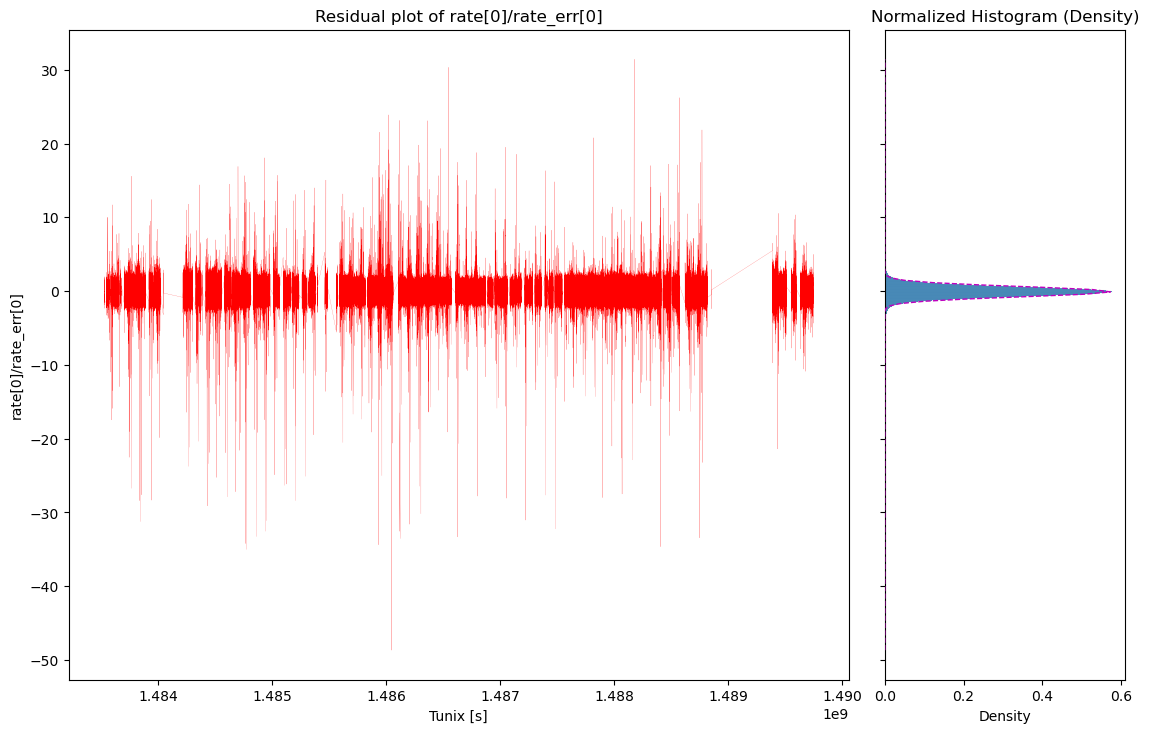

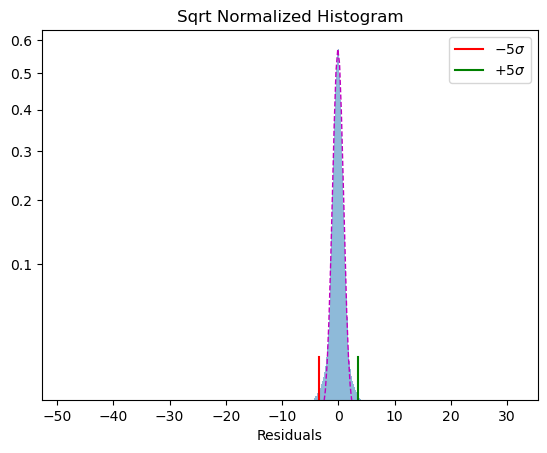

In [8]:
from src.visualizer import plot_val_residual, plot_val_pull

for target_name in cfg.dataset.target_names:
    # Even though we call the function that has as name "plot_val_residual"
    # we apply it to the whole dataset including GRBs
    if target_name != "rate[0]":
        plot_val_residual(subset_dataset_full_GRBs,
                          pred,
                          target_name=target_name,
                          save_path=None,
                          save_path_hist=None)
    else:
        plot_val_pull(subset_dataset_full_GRBs,
                      pred,
                      target_name=target_name,
                      save_path=None,
                      save_path_hist=None)

In [9]:
from src.visualizer import get_time_y_y_hat, find_moments, get_column

tmp = get_time_y_y_hat(subset_dataset_full_GRBs, pred, target_name)
sorted_time, sorted_y, sorted_y_hat = tmp
del tmp

k = 5

residuals = sorted_y-sorted_y_hat
var = residuals

if target_name != "rate[0]":
    print("Thresholding using residuals:")
    new_mean, new_std = find_moments(residuals)
else:
    print("Thresholding using residuals/rate_err[0]")
    rate_err = get_column(subset_dataset_full_GRBs, "rate_err[0]")
    pulls = residuals/rate_err
    new_mean, new_std = find_moments(pulls)

    var = pulls

print(np.sum(var.values > k*new_std))    

Index(['unix_time', 'glat', 'glon', 'altitude', 'temperature', 'fe_cosmic',
       'raz', 'decz', 'rax', 'decx', 'is_orbit_up', 'time_since_saa', 'B_r',
       'B_theta', 'B_phi'],
      dtype='object')
Thresholding using residuals:
16140


/home/zenchiyu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


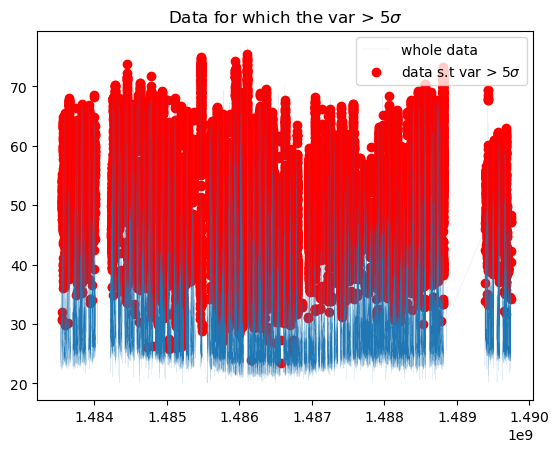

In [9]:
plt.plot(data_df["unix_time"], data_df[cfg.dataset.target_names[0]],
         linewidth=0.05, label="whole data")

plt.scatter(data_df.loc[var.values > 5*new_std, "unix_time"],
         data_df.loc[var.values > 5*new_std, cfg.dataset.target_names[0]],
         color='r', label=fr"data s.t var > ${k}\sigma$")
plt.title(fr"Data for which the var > ${k}\sigma$")
plt.legend()
plt.show()

### GRBs

In [10]:
import pandas as pd

In [11]:
GRBs = pd.read_csv("../data/GRBs.csv")
GRBs

,Number,GRB_Name,Trigger_time_UTC,unix_time
0,1,GRB_160924A,2016-09-24T06:04:09.040,1.474697e+09
1,2,GRB_160928A,2016-09-28T19:48:05.000,1.475092e+09
2,3,GRB_161009651,2016-10-09T15:38:07.190,1.476027e+09
3,4,GRB_161011217,2016-10-11T05:13:44.420,1.476163e+09
4,5,GRB_161012989,2016-10-12T23:45:11.380,1.476316e+09
5,6,GRB_161013948,2016-10-13T22:44:40.100,1.476399e+09
6,7,GRB_161120401,2016-11-20T09:38:33.520,1.479635e+09
7,8,GRB_161129A,2016-11-29T07:11:40.000,1.480404e+09
8,9,GRB_161203A,2016-12-03T18:41:07.750,1.480790e+09
9,10,GRB_161205A,2016-12-05T13:27:18.000,1.480944e+09


Text(0.5, 1.0, '55 GRBs against full dataset')

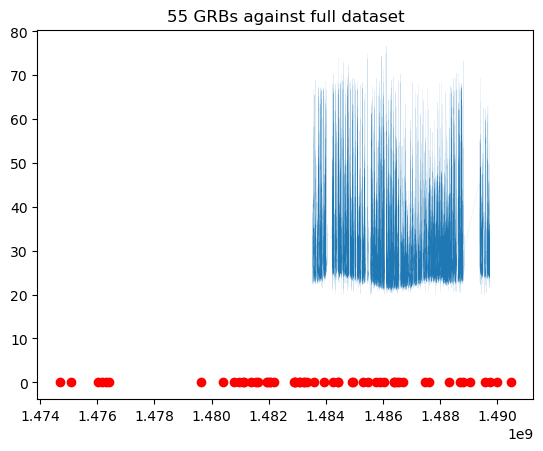

In [12]:
plt.plot(data_df["unix_time"], data_df[cfg.dataset.target_names[0]], linewidth=0.05)
plt.scatter(GRBs["unix_time"], np.zeros_like(GRBs["unix_time"]), color="r")
plt.title("55 GRBs against full dataset")

Let's only take a look at the GRBs happening within the same time range

In [13]:
mask = data_df["unix_time"].min() <= GRBs["unix_time"].values
mask &= GRBs["unix_time"].values <= data_df["unix_time"].max()
print(f"Out of 55, there are: {mask.sum()} GRBs within our time range")

Out of 55, there are: 25 GRBs within our time range


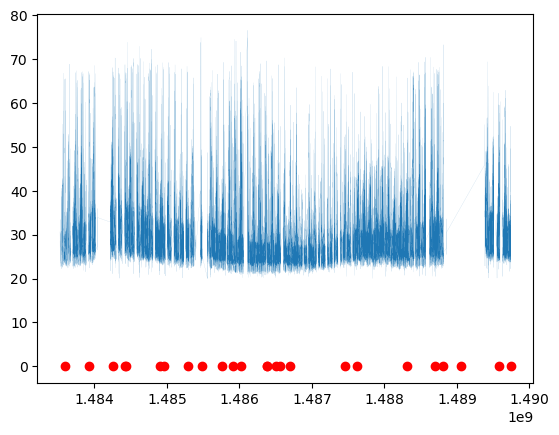

In [14]:
plt.plot(data_df["unix_time"], data_df[cfg.dataset.target_names[0]], linewidth=0.05)
plt.scatter(GRBs["unix_time"][mask], np.zeros_like(GRBs["unix_time"][mask]), color="r")
plt.show()

Zooming into the GRBs with a window of 100 seconds before and 100 seconds after

- (unix_time < 1483596747.0) || (unix_time > 1483596947.0)  # GRB_170105A
- (unix_time < 1483931755.0) || (unix_time > 1483931955.0)  # GRB_170109A
- (unix_time < 1484262869.0) || (unix_time > 1484263069.0)  # GRB_170112B
- (unix_time < 1484431170.0) || (unix_time > 1484431370.0)  # GRB_170114A
- (unix_time < 1484423852.0) || (unix_time > 1484424052.0)  # GRB_170114B
- (unix_time < 1484911010.0) || (unix_time > 1484911210.0)  # GRB_170120A
- (unix_time < 1484962515.2) || (unix_time > 1484962715.2)  # GRB_170121A
- (unix_time < 1485291386.0) || (unix_time > 1485291586.0)  # GRB_170124A
- (unix_time < 1485480849.0) || (unix_time > 1485481049.0)  # GRB_170127C
- (unix_time < 1485760385.0) || (unix_time > 1485760585.0)  # GRB_170130A
- (unix_time < 1485904399.0) || (unix_time > 1485904599.0)  # GRB_170131A
- (unix_time < 1486019894.0) || (unix_time > 1486020094.0)  # GRB_170202B
- (unix_time < 1486378217.7) || (unix_time > 1486378417.7)  # GRB_170206A
- (unix_time < 1486381110.0) || (unix_

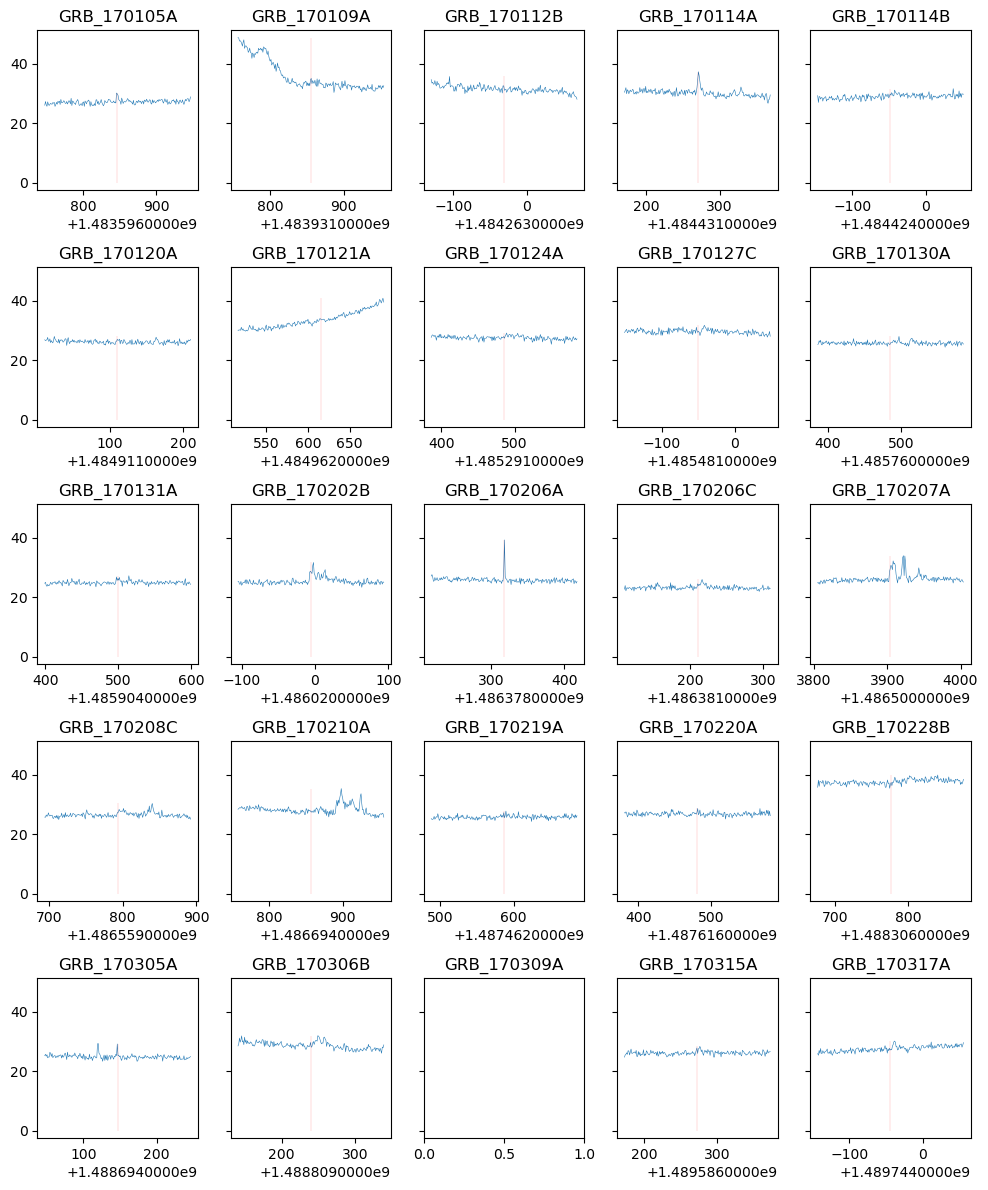

In [14]:
w = 100

fig, axs = plt.subplots(5, 5, figsize=(10, 12), sharey=True)

for i, GRB_name, GRB_tunix in zip(range(mask.sum()),
                        GRBs["GRB_Name"][mask],
                        GRBs["unix_time"][mask]):
    # print(GRB_name, GRB_tunix-w, GRB_tunix+w)
    # print(f"- (unix_time >= {GRB_tunix-w}) & (unix_time <= {GRB_tunix+w})  # {GRB_name}")
    print(f"- (unix_time < {GRB_tunix-w}) || (unix_time > {GRB_tunix+w})  # {GRB_name}")
    m = data_df["unix_time"] >= GRB_tunix-w
    m &= data_df["unix_time"] <= GRB_tunix+w
    
    if m.sum() > 0:
        axs[i//5, i%5].plot(data_df.loc[m, "unix_time"],
                data_df.loc[m, cfg.dataset.target_names[0]], linewidth=0.4)
        axs[i//5, i%5].vlines(GRB_tunix, 0,
                            data_df.loc[m, cfg.dataset.target_names[0]].max(),
                            'r', linewidth=0.1)
    axs[i//5, i%5].set_title(GRB_name)
plt.tight_layout()

Comparing with where our algo fails

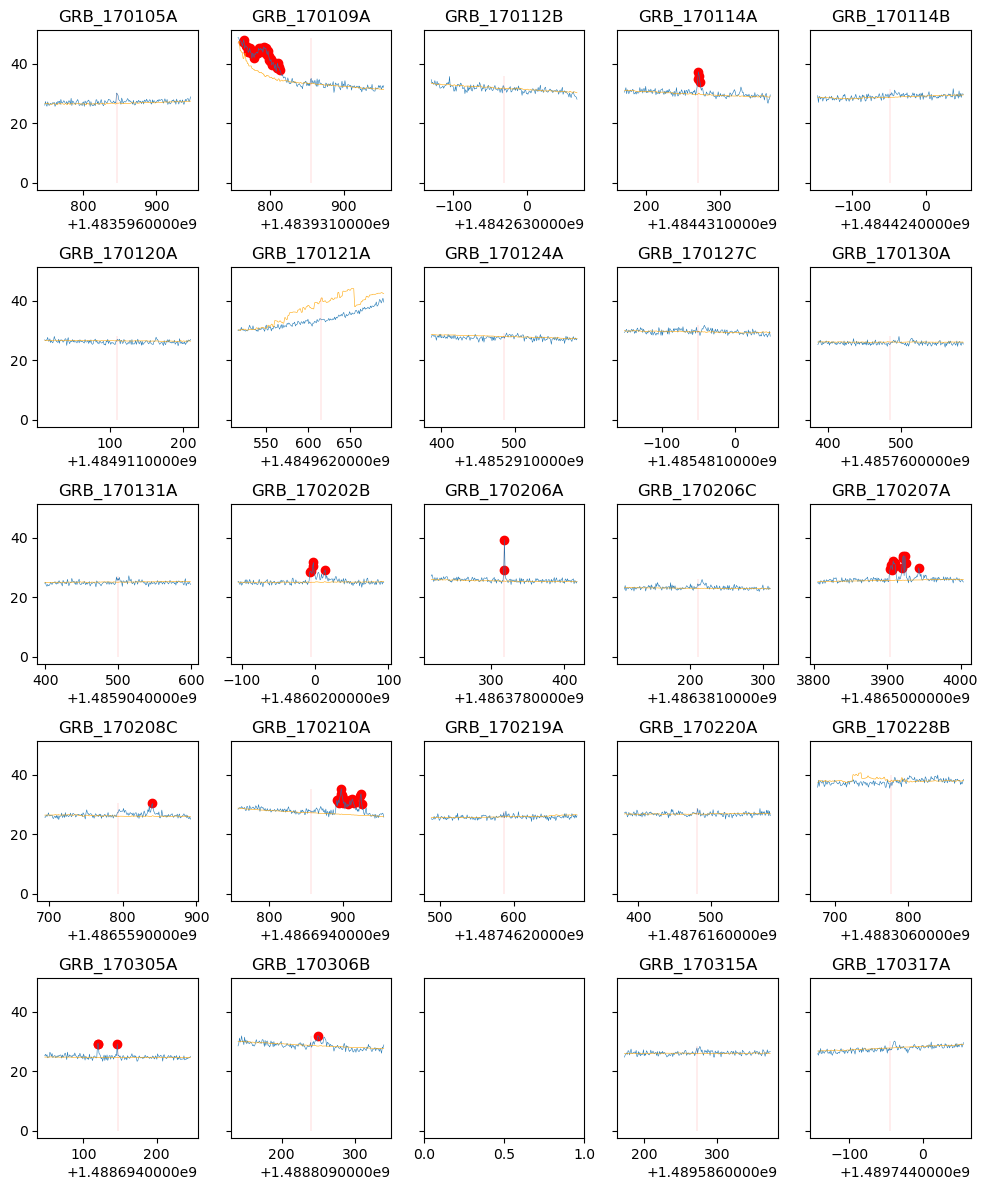

In [15]:
k = 5

fig, axs = plt.subplots(5, 5, figsize=(10, 12), sharey=True)

for i, GRB_name, GRB_tunix in zip(range(mask.sum()),
                        GRBs["GRB_Name"][mask],
                        GRBs["unix_time"][mask]):
     m = data_df["unix_time"] >= GRB_tunix-w
     m &= data_df["unix_time"] <= GRB_tunix+w
     mvar = data_df["unix_time"] >= GRB_tunix-w
     mvar &= data_df["unix_time"] <= GRB_tunix+w
     mvar &= (var.values > k*new_std)
     if m.sum() > 0:
          axs[i//5, i%5].plot(data_df[m]["unix_time"],
                    data_df[m][cfg.dataset.target_names[0]], linewidth=0.4)
          axs[i//5, i%5].plot(data_df[m]["unix_time"],
                              pred[m.values].detach().cpu(), 'orange', linewidth=0.4)
          axs[i//5, i%5].vlines(GRB_tunix, 0,
                                data_df[m][cfg.dataset.target_names[0]].max(),
                                'r', linewidth=0.1)
          axs[i//5, i%5].set_title(GRB_name)
     if mvar.sum() > 0:
          axs[i//5, i%5].scatter(data_df.loc[mvar, "unix_time"],
               data_df.loc[mvar, cfg.dataset.target_names[0]],
               color='r', label=fr"data s.t var > ${k}\sigma$")
plt.tight_layout()